# Intro
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Load package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Read Files

In [2]:
train_dataset = pd.read_csv("/content/drive/MyDrive/kaggle/train.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/kaggle/test.csv")
print(train_dataset.info())
print(train_dataset.head())
print(test_dataset.info())
print(test_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

# Check Survived
It seems that 39% of passenger survived. We need to dig-in others data column to find out the relationshipe between survival.

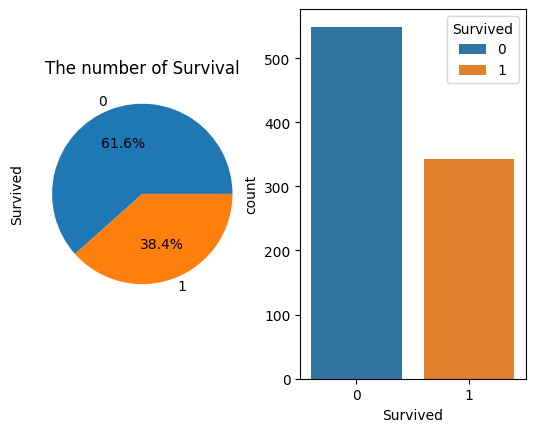

In [3]:
fig, axes = plt.subplots(1, 2)
train_dataset["Survived"].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%')
axes[0].set_title("The percetage of Survival")
sns.countplot(data = train_dataset, x="Survived", ax = axes[1], hue="Survived")
axes[0].set_title("The number of Survival")
plt.show()

# Data Cleaning and Encoding
### Categorical
- Ticket
- Cabin
- Embarked
- Name

### Numerical
- PassengerId
- Survived
- Pclass
- Age
- SibSp
- Parch
- Fare


In [4]:
print("===== Train =====")
print(train_dataset.isna().sum())
print("===== Test =====")
print(test_dataset.isna().sum())

===== Train =====
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
===== Test =====
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Categorical Data Featuring

#### Sex - Categorical
The original data shows male / female. In here, we have to do data encoding tenical to transform into 1 and 0. However, we found that nearly 75% of female survived on the ship and  18% of male save life. Clearly, we know the sex column stands an important feature for our model training.

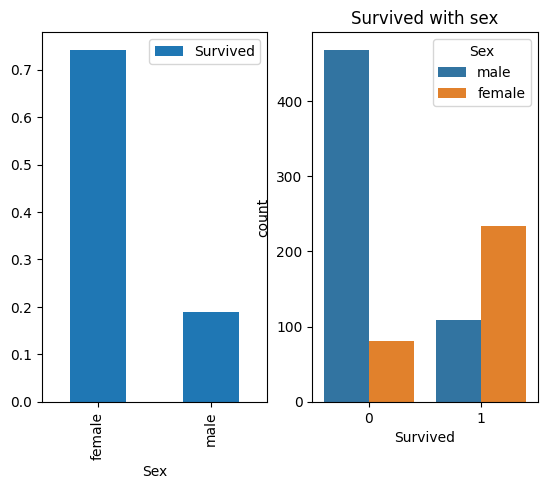

In [5]:
fig, axes = plt.subplots(1, 2)
train_dataset[["Survived", "Sex"]].groupby("Sex").mean().plot.bar(ax=axes[0])
sns.countplot(x="Survived", data=train_dataset, hue="Sex").set_title("Survived with sex")
plt.show()
# label encoding for sex data
# train
train_dataset["Sex"] = train_dataset["Sex"].astype("category")
train_sex_code = train_dataset["Sex"].cat.codes
train_sex_category = train_dataset["Sex"]

# test
test_dataset["Sex"] = test_dataset["Sex"].astype("category") # test
test_sex_code = test_dataset["Sex"].cat.codes
test_sex_category = test_dataset["Sex"]

train_dataset["Sex"] = train_sex_code
test_dataset["Sex"] = test_sex_code

####Ticket - Categorical
For observation, ticket data seems unvaluable. We tend to dorp this column.

In [6]:
train_dataset = train_dataset.drop(["Ticket"], axis = 1)
test_dataset = test_dataset.drop(["Ticket"], axis = 1)

#### Cabin - Categorical
This missing value of cabin is nearly 77% in train dataset and 78% in test dataset. It could be considered to drop off the variable.


In [7]:
train_cabin_missing_percentage = train_dataset["Cabin"].isna().sum() / len(train_dataset)
test_cabin_missing_percentage = test_dataset["Cabin"].isna().sum() / len(test_dataset)
print("The percentage of Cabin data in train dataset: {}".format(train_cabin_missing_percentage))
print("The percentage of Cabin data in test dataset: {}".format(test_cabin_missing_percentage))
train_dataset = train_dataset.drop(["Cabin"], axis = 1)
test_dataset = test_dataset.drop(["Cabin"], axis = 1)

The percentage of Cabin data in train dataset: 0.7710437710437711
The percentage of Cabin data in test dataset: 0.7822966507177034


### Embarked - Categorical
Replace missing value via S. Also, each port shows differenct percentage of survived. It seems that it has a relationship with survived data, and we adopt encoding technique in embarked data.

In [12]:
train_embarked_missing = train_dataset["Embarked"].isna().sum()
test_embarked_missing = test_dataset["Embarked"].isna().sum()
print("The percentage of Embarked data in train dataset: {}".format(train_embarked_missing))
print("The percentage of Embarked data in test dataset: {}".format(test_embarked_missing))

train_dataset["Embarked"].value_counts()
train_dataset["Embarked"] = train_dataset["Embarked"].fillna("S")

The percentage of Embarked data in train dataset: 2
The percentage of Embarked data in test dataset: 0


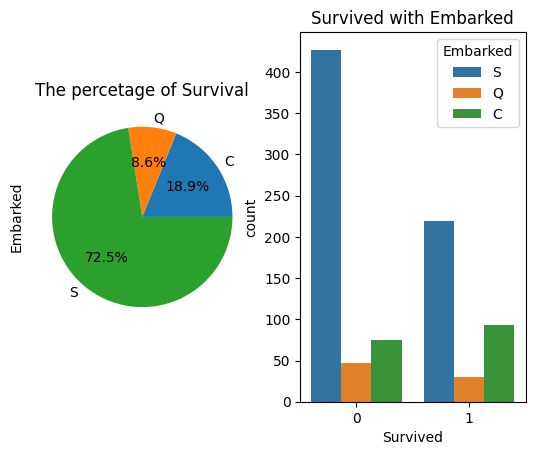

In [26]:
fig, axes = plt.subplots(1, 2)
train_dataset[["Survived", "Embarked"]].groupby("Embarked")["Embarked"].count().plot.pie(ax=axes[0], autopct='%1.1f%%')
axes[0].set_title("The percetage of Survival")
axes[1] = sns.countplot(x="Survived", data=train_dataset, hue="Embarked").set_title("Survived with Embarked")
plt.show()

# label encoding
train_dataset["Embarked"] = train_dataset["Embarked"].astype("category")
train_Embarked_code = train_dataset["Embarked"].cat.codes
train_Embarked_category = train_dataset["Embarked"]

# test
test_dataset["Embarked"] = test_dataset["Embarked"].astype("category")
test_Embarked_code = test_dataset["Embarked"].cat.codes
test_Embarked_category = test_dataset["Embarked"]

train_dataset["Embarked"] = train_Embarked_code
test_dataset["Embarked"] = test_Embarked_code

#### Name - Categorical
At this point of view, we don't need Name column because it's hard to convert into any categorical data, so we drop the column.

In [27]:
train_dataset = train_dataset.drop(["Name"], axis = 1)
test_dataset = test_dataset.drop(["Name"], axis = 1)

## Numerical Data Featuring

####Age Column

In [ ]:
# Replace Nan via Mean Age
train_mean_age = train_dataset["Age"].mean()
test_mean_age = test_dataset["Age"].mean()
train_dataset["Age"] = train_dataset["Age"].fillna(train_mean_age)
test_dataset["Age"] = test_dataset["Age"].fillna(test_mean_age)
print("[trian]After replace: {}".format(train_dataset["Age"].isna().sum()))
print("[test]After replace: {}".format(test_dataset["Age"].isna().sum()))

age_bins = [0, 2, 40, 60, 100]
train_age_cut = pd.cut(train_dataset["Age"], age_bins, labels=["baby", "young_adults", "middle_age_adult", "elderly"])
test_age_cut = pd.cut(train_dataset["Age"], age_bins, labels=["baby", "young_adults", "middle_age_adult", "elderly"])
train_dataset["Age_group"] = train_age_cut
test_dataset["Age_group"] = test_age_cut

# label encoding
train_age_code = train_dataset["Age_group"].cat.codes
train_age_category = train_dataset["Age_group"]
print("===== Train =====")
print(dict(zip(train_age_code, train_age_category)))

# test
test_age_code = test_dataset["Age_group"].cat.codes
test_age_category = test_dataset["Age_group"]
print("===== Test =====")
print(dict(zip(test_age_code, test_age_category)))

train_dataset["Age_group"] = train_age_code
test_dataset["Age_group"] = test_age_code

print(train_dataset.head())
print(test_dataset.head())


# remove Age column
train_dataset = train_dataset.drop(["Age"], axis = 1)
test_dataset = test_dataset.drop(["Age"], axis = 1)

## Fare Column

In [ ]:
# check outlier
sns.boxplot(x = "Survived", y = "Fare", data = train_dataset)
plt.show()

# remove outlier
train_dataset["Fare"].replace({512.3292: train_dataset["Fare"].mean()}, inplace=True)
test_dataset["Fare"].replace({512.3292: test_dataset["Fare"].mean()}, inplace=True)
test_dataset["Fare"] = test_dataset["Fare"].fillna(test_dataset["Fare"].mean())

In [ ]:
train_dataset["Fare"].describe()
# check outlier
sns.scatterplot(x = "Pclass", y = "Fare", data = train_dataset, hue="Pclass")
plt.show()

In [ ]:
pclass_1 = train_dataset[train_dataset["Pclass"] == 1]
sns.boxplot(x="Fare", data = pclass_1)
plt.show()

# remove outliter
Q1 = pclass_1['Fare'].quantile(0.25)
Q3 = pclass_1['Fare'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = pclass_1[(pclass_1['Fare'] < Q1 - threshold * IQR) | (pclass_1['Fare'] > Q3 + threshold * IQR)]
train_dataset.drop(outliers.index)

### Pclass Data

In [ ]:
sns.countplot(x="Survived", data=train_dataset, hue="Pclass").set_title("Survived with Pclass")
plt.show()

## Age Data Become Categorical Data

In [ ]:
age_bins = [0, 2, 40, 60, 100]
train_age_cut = pd.cut(train_dataset["Age"], age_bins, labels=["baby", "young_adults", "middle_age_adult", "elderly"])
test_age_cut = pd.cut(train_dataset["Age"], age_bins, labels=["baby", "young_adults", "middle_age_adult", "elderly"])
train_dataset["Age_group"] = train_age_cut
test_dataset["Age_group"] = test_age_cut

# label encoding
train_age_code = train_dataset["Age_group"].cat.codes
train_age_category = train_dataset["Age_group"]
print("===== Train =====")
print(dict(zip(train_age_code, train_age_category)))

# test
test_age_code = test_dataset["Age_group"].cat.codes
test_age_category = test_dataset["Age_group"]
print("===== Test =====")
print(dict(zip(test_age_code, test_age_category)))

train_dataset["Age_group"] = train_age_code
test_dataset["Age_group"] = test_age_code

print(train_dataset.head())
print(test_dataset.head())


# remove Age column
train_dataset = train_dataset.drop(["Age"], axis = 1)
test_dataset = test_dataset.drop(["Age"], axis = 1)

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(data = train_dataset.corr(), annot=True)
plt.show()

# Build Model

In [ ]:
X = train_dataset.drop(["Survived", "Name", "Ticket", "PassengerId",], axis = 1)
y = train_dataset["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build pipeline

In [ ]:
def model_func(ML_model):
  model = ML_model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  train_accur = model.score(X_train, y_train)
  test_accur = model.score(X_test, y_test)
  return train_accur, test_accur

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
neighbors = np.arange(1, 25)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  train_accur, test_accur = model_func(knn)
  train_accuracies[neighbor] = train_accur
  test_accuracies[neighbor] = test_accur


# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()